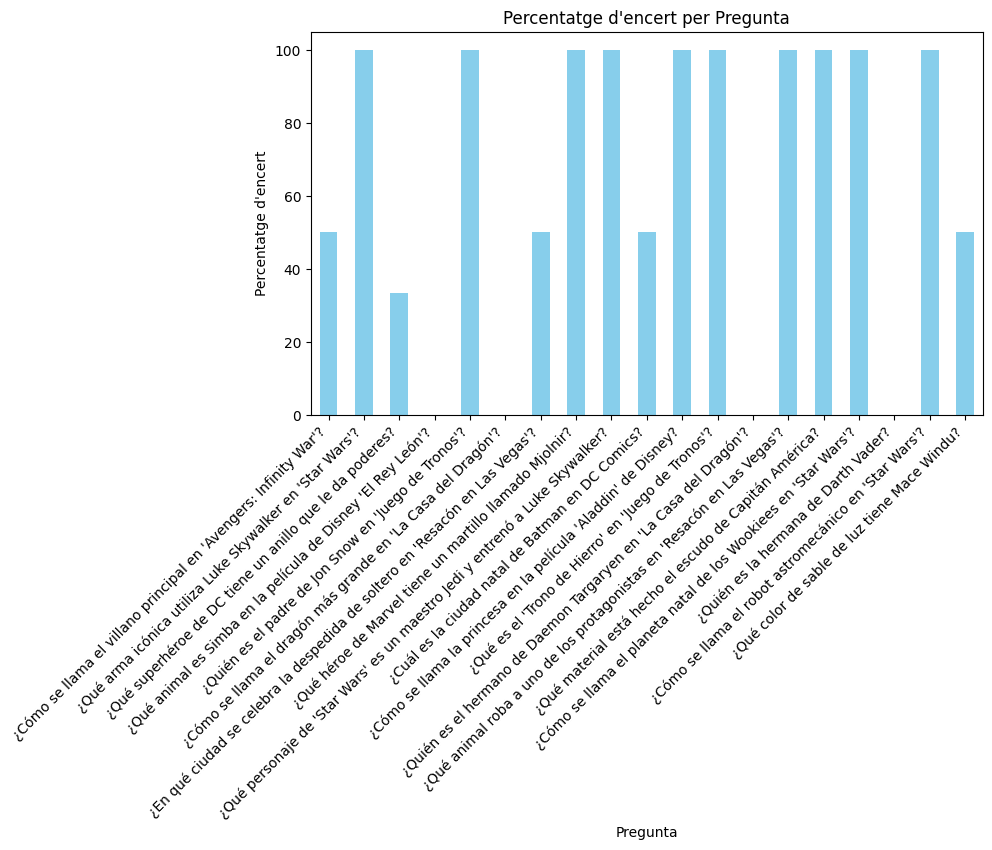

In [4]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
routeData = './data/AllData.json'
statisticsRoute = './data/GameData.json'

# Cargar los datos de los archivos JSON
with open(routeData, encoding='utf-8') as f:
    fullData = json.load(f)

with open(statisticsRoute, encoding='utf-8') as f:
    stadisticsData = json.load(f)

Data = []

# Procesar los datos
attempts = np.array([pregunta["intents"] for pregunta in stadisticsData["dadesPerPregunta"]])
corrects = np.array([pregunta["correctes"] for pregunta in stadisticsData["dadesPerPregunta"]])

percentages = np.round((corrects / attempts) * 100, 2)

for i, pregunta in enumerate(stadisticsData["dadesPerPregunta"]):
    for data in fullData["preguntes"]:  # Cambiado de fulldata a fullData
        if data["id"] == pregunta["id"]:
            Data.append({
                "Pregunta": data["pregunta"],
                "Percentatge d'encert": percentages[i]
            })

df = pd.DataFrame(Data)
df.set_index("Pregunta", inplace=True)

plt.figure(figsize=(10, 6))
df["Percentatge d'encert"].plot(kind='bar', color='skyblue')
plt.title('Percentatge d\'encert per Pregunta')
plt.xlabel('Pregunta')
plt.ylabel('Percentatge d\'encert')
plt.xticks(rotation=45, ha='right')

# Ajustar el diseño para acomodar un gran número de preguntas
plt.tight_layout()
plt.subplots_adjust(bottom=0.3)

plt.show()